In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Titanic-dataset.csv")

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.isnull().sum()*100/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#df.age
# df ['Age men']

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

 Age <- mean
embarked <- delete rows
Cabin <-delete the col

In [12]:
df ['Age'].mean

<bound method Series.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [13]:
df['Age']=df['Age'].fillna(df['Age'].mean())  

In [14]:
df.dropna(subset =['Embarked'],inplace=True)

In [15]:
df.drop(['Cabin'],axis =1,inplace=True)

In [16]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


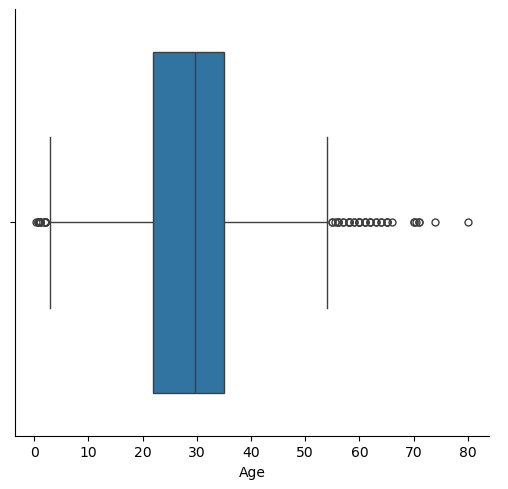

In [17]:
import seaborn as sns
sns.catplot(x='Age',data =df,kind ='box')

In [18]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64

In [19]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1
ul = q3 +1.95*iqr
ll =q1 -1.5*iqr

q1,q3,iqr,ul,ll

(22.0, 35.0, 13.0, 60.349999999999994, 2.5)

In [20]:
df[((df.Age>=ll) & (df.Age <= ul))].shape

(844, 11)

In [21]:
print(845-889)

-44


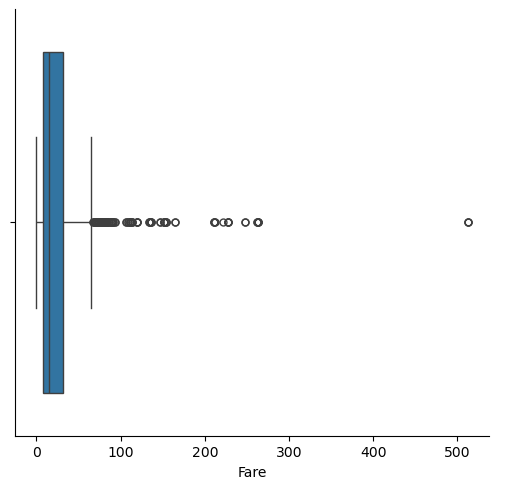

In [22]:
sns.catplot(x='Fare',data =df, kind ='box')

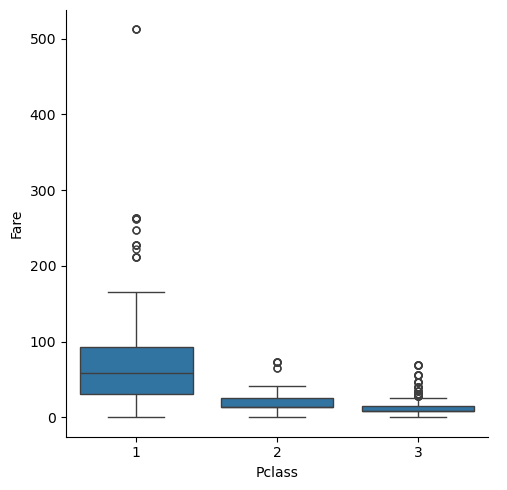

In [23]:
sns.catplot(x='Pclass',y='Fare',data =df, kind ='box')

In [24]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3-q1
ul = q3 +1.95*iqr
ll =q1 -1.5*iqr

df_filtered = df[((df.Fare <= ul) & (df.Fare >= ll))]

In [25]:
q1,q3,ul,ll

(7.8958, 31.0, 76.05319, -26.7605)

In [26]:
def clean_fare(df) :
    q1 = df['Fare'].quantile(0.25)
    q3 = df['Fare'].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    return df[((df.Fare <= ul) & (df.Fare >= ll))]

clean_p_1 =clean_fare(df[df.Pclass == 1])
clean_p_2 =clean_fare(df[df.Pclass == 2])
clean_p_3 =clean_fare(df[df.Pclass == 3])
final_clean =pd.concat([clean_p_1,clean_p_2 ,clean_p_3])
    

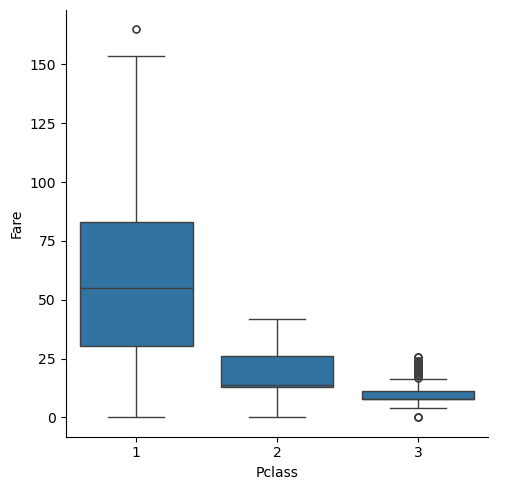

In [27]:
sns.catplot(x='Pclass',y='Fare',data =final_clean, kind ='box')

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
df =df.drop(['PassengerId','Ticket','Name'],axis =1)

In [30]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [31]:
df['Sex'] = df['Sex'].apply(lambda gender :1 if gender =='male' else 0)

In [32]:
df['Embarked'] = df['Embarked'].map(
    {  'S': 1,
       'C': 2,
       'Q': 3,
    })


# df.drop (['Embarked2'],axis=1,inplace=True)


In [34]:
df2 =pd.get_dummies(df,columns=['Embarked','Sex'])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
features =df.drop(['Survived'],axis=1)
labels =df['Survived']
train_features,test_features,\
train_labels,test_labels = train_test_split(features,
                                            labels,
                                            test_size=0.2,
                                            random_state=54545)

In [37]:
train_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
396,3,0,31.000000,0,0,7.8542,1
779,1,0,43.000000,0,1,211.3375,1
735,3,1,28.500000,0,0,16.1000,1
7,3,1,2.000000,3,1,21.0750,1
183,2,1,1.000000,2,1,39.0000,1
...,...,...,...,...,...,...,...
458,2,0,50.000000,0,0,10.5000,1
150,2,1,51.000000,0,0,12.5250,1
858,3,0,24.000000,0,3,19.2583,2
347,3,0,29.699118,1,0,16.1000,1


In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [39]:
min_max_scaler =MinMaxScaler()
min_max_scaler.fit(train_features)
train_features_scaled =min_max_scaler.transform(train_features)
test_features_scaled = min_max_scaler.transform(test_features)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(train_features_scaled,train_labels)

KNeighborsClassifier(n_neighbors=2)

In [42]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Accuracy: 0.80
Precision: 0.82
Recall: 0.61
F1: 0.70


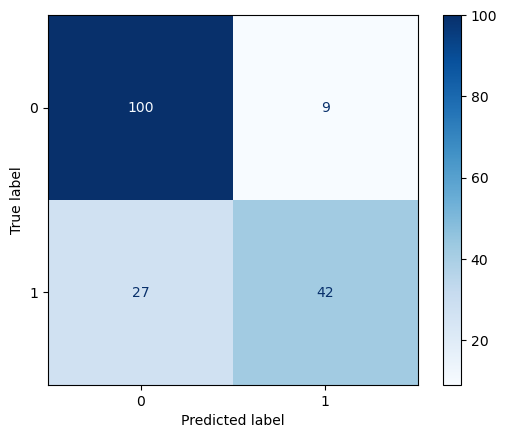

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# ... (Your model training code) ...

predictions = model.predict(test_features_scaled)

def performance(test_labels, predictions):
    acc = accuracy_score(test_labels, predictions)
    pre = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    print("Accuracy: {:.2f}\nPrecision: {:.2f}\nRecall: {:.2f}\nF1: {:.2f}".format(acc, pre, recall, f1))

    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)

performance(test_labels, predictions)

In [44]:
import pickle
pickle.dump(model,open('knn_model.pkl','wb'))

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
model = DecisionTreeClassifier(max_depth =3)
model.fit(train_features_scaled,train_labels)

DecisionTreeClassifier(max_depth=3)

Accuracy: 0.80
Precision: 0.78
Recall: 0.67
F1: 0.72


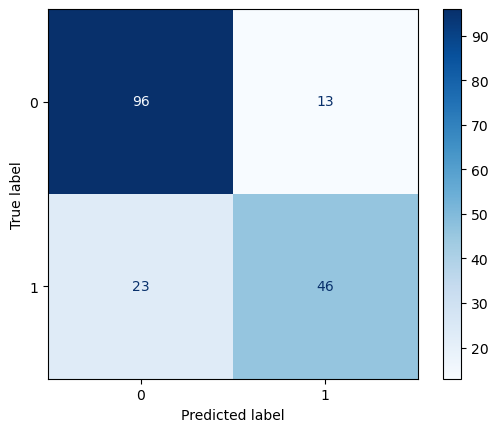

In [47]:
predictions = model.predict(test_features_scaled)
performance(test_labels,predictions)

In [48]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [49]:
from sklearn import tree
import matplotlib.pyplot as plt

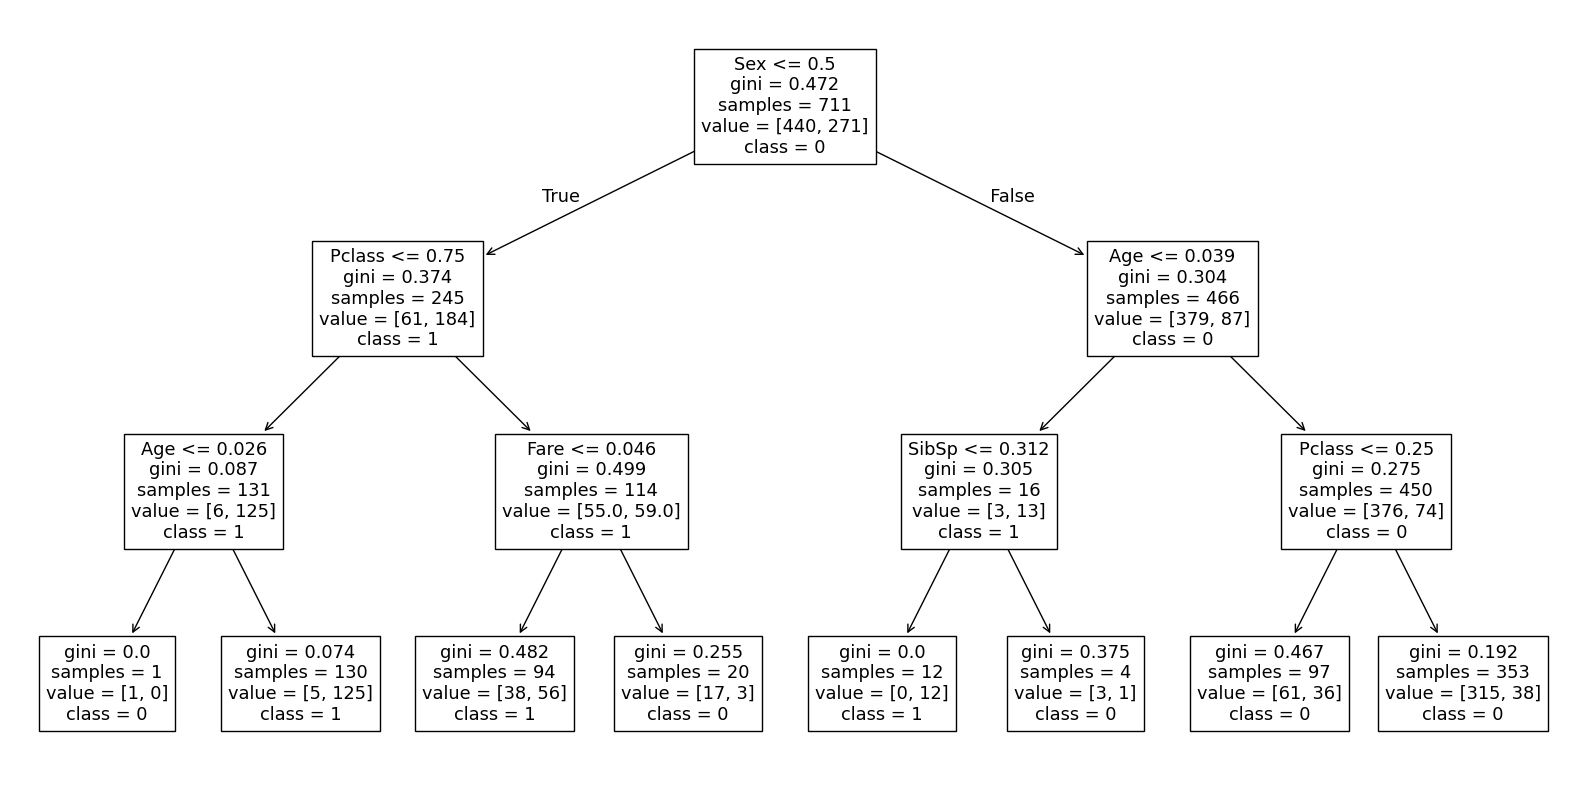

In [50]:
fix, ax = plt.subplots(1,1, figsize=(20,10))
_ = tree.plot_tree(
    model,
    feature_names = features.columns.tolist(),
    class_names = ['0', '1']
)

In [51]:
from sklearn.ensemble import RandomForestClassifier #bagging
import xgboost #boosting
import catboost
import lightgbm




In [52]:
pip install catboost

In [53]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [54]:
model_RF = RandomForestClassifier()
model_XGB = xgboost.XGBClassifier()
model_CAT =catboost.CatBoostClassifier()
model_LGBM =lightgbm.LGBMClassifier()

In [55]:
model_RF.fit(train_features_scaled,train_labels)
model_XGB.fit(train_features_scaled,train_labels)
model_CAT.fit(train_features_scaled,train_labels)
model_LGBM.fit(train_features_scaled,train_labels)

Learning rate set to 0.008906
0:	learn: 0.6865490	total: 182ms	remaining: 3m 1s
1:	learn: 0.6802721	total: 188ms	remaining: 1m 33s
2:	learn: 0.6743343	total: 194ms	remaining: 1m 4s
3:	learn: 0.6686116	total: 200ms	remaining: 49.8s
4:	learn: 0.6654021	total: 203ms	remaining: 40.5s
5:	learn: 0.6599704	total: 209ms	remaining: 34.6s
6:	learn: 0.6542922	total: 215ms	remaining: 30.5s
7:	learn: 0.6508895	total: 219ms	remaining: 27.2s
8:	learn: 0.6453027	total: 225ms	remaining: 24.7s
9:	learn: 0.6399496	total: 231ms	remaining: 22.8s
10:	learn: 0.6350207	total: 237ms	remaining: 21.3s
11:	learn: 0.6301090	total: 242ms	remaining: 20s
12:	learn: 0.6256445	total: 248ms	remaining: 18.9s
13:	learn: 0.6209371	total: 253ms	remaining: 17.8s
14:	learn: 0.6158438	total: 259ms	remaining: 17s
15:	learn: 0.6109449	total: 265ms	remaining: 16.3s
16:	learn: 0.6059877	total: 271ms	remaining: 15.7s
17:	learn: 0.6023167	total: 277ms	remaining: 15.1s
18:	learn: 0.5982922	total: 282ms	remaining: 14.6s
19:	learn: 0.5

C:\Users\DELL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

Accuracy: 0.80
Precision: 0.75
Recall: 0.72
F1: 0.74
Accuracy: 0.80
Precision: 0.79
Recall: 0.67
F1: 0.72
Accuracy: 0.80
Precision: 0.79
Recall: 0.65
F1: 0.71
Accuracy: 0.81
Precision: 0.80
Recall: 0.70
F1: 0.74


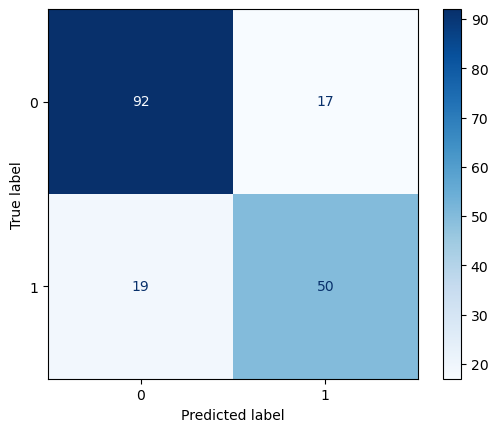

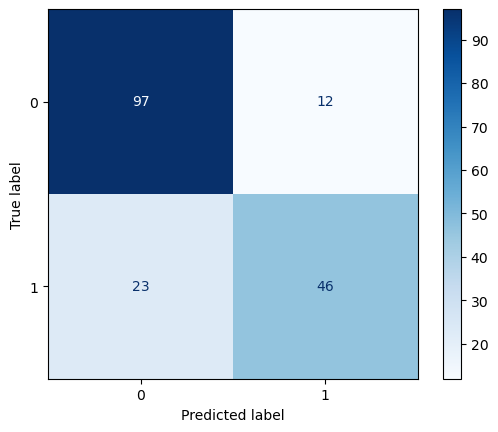

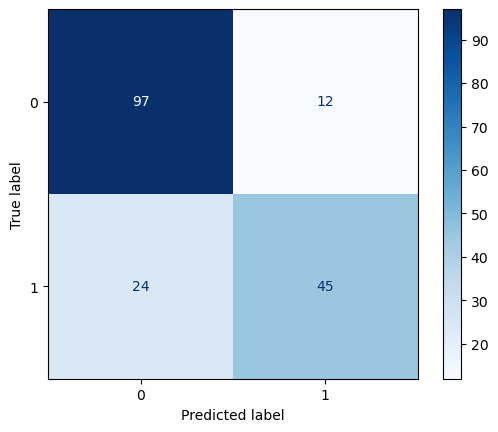

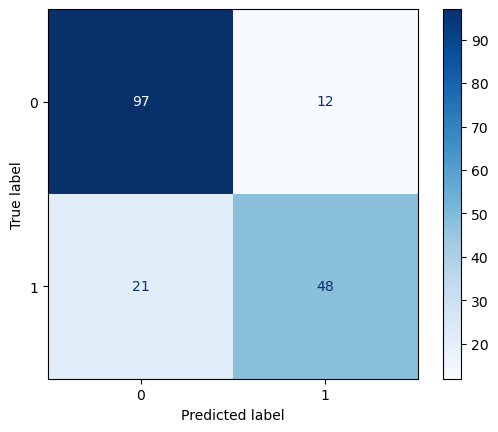

In [56]:
predictions = model_RF.predict(test_features_scaled)
performance(test_labels, predictions) 

predictions = model_XGB.predict(test_features_scaled)
performance(test_labels, predictions) 

predictions = model_CAT.predict(test_features_scaled)
performance(test_labels, predictions) 

predictions = model_LGBM.predict(test_features_scaled)
performance(test_labels, predictions) 

In [57]:
model_LGBM.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Accuracy: 0.81
Precision: 0.84
Recall: 0.62
F1: 0.72


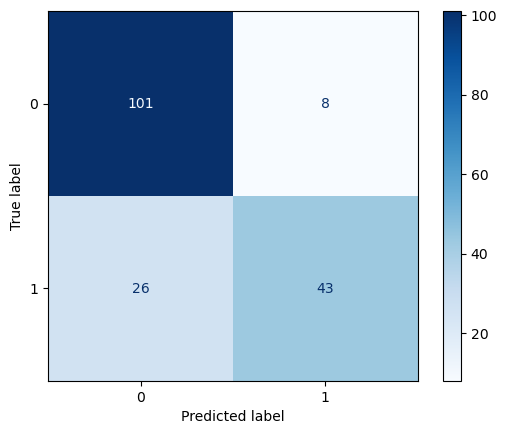

In [58]:
model_RF =RandomForestClassifier(n_estimators=200, max_depth =5)
model_RF.fit(train_features_scaled,train_labels)
predictions = model_RF.predict(test_features_scaled)
performance(test_labels, predictions) 